# Analysis of the CaK. line
flare 6/9/2017

Remark that there are two flares here 

# start with flare of 11:55:47 

In [1]:
import sys
sys.path.append('D:/solar flares/data/2017-09-06')
import use_nessi as un

In [2]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


# functies uittesten met CaK

In [3]:
def add_enters(s, length_row):
    n = 0
    while n+length_row <len(s):
        n += length_row
        s = s[:n] +'\n' + s[n:]
        n += 2
    return s


In [4]:
reload(un)
# And now the running commands
openfile="nb_3950_2019-05-06T08_34_01_scans=0-452_corrected_im.fits"
header= f.getheader(un.get_file_path_fits(openfile))
header = add_enters(str(header), length_row=79)

print(header)
# np.savetxt('headerCaK19.txt', header)

with open('headers/headerCaK19.txt', 'w') as file:
    file.write(header)




SIMPLE  =                    T / Written by IDL:  Thu Nov 14 15:27:18 2019     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1888 / Number of positions along axis 1              
 NAXIS2  =                 1236 / Number of positions along axis 2              
 NAXIS3  =                   28 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                  453 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 TIMESYS = 'UTC     '           /                                               
 DATE    = '2019-11-15T11:56:04' / Creation UTC date of FITS header             
 VAR_KEYS= 'VAR-EXT-DATE-BEG;DATE-BEG,VAR-EXT-DATE-END;DATE-END,VAR-EXT-DATE-AV&
'CONTINUE  'G;DATE-AVG,VAR-EX

for the spectral positions of the data: see harps paper! We calculate these here:

In [5]:
peak = 3933.663
D = np.array([-1.00, -0.85, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.07, 0, 0.07, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.85, 1.00, 0 ])
wavl = D+peak
wavl[-1] = 4000
np.save('spectfile3950_.npy', wavl)
wavl, np.shape(wavl)

(array([3932.663, 3932.813, 3933.013, 3933.113, 3933.213, 3933.313,
        3933.413, 3933.513, 3933.593, 3933.663, 3933.733, 3933.813,
        3933.913, 3934.013, 3934.113, 3934.213, 3934.313, 3934.513,
        3934.663, 4000.   ]),
 (20,))

The time series are also not yet given. Calcultate them from: 
START+'2017-09-06T11:56:28.03739' END= '2017-09-06T12:39:22.07020' in units [minutes]

the found wavelengts by solarnet where  [393.219216 393.252048 393.278192 393.304944 393.31148  393.318016
 393.324552 393.330936 393.337472 393.344008 393.350544 393.356928
 393.363464 393.37     393.376536 393.383072 393.389456 393.395992
 393.402528 393.409064 393.415448 393.421984 393.42852  393.435056
 393.461808 393.487952 393.520784 400.114744]


 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


(1236, 1888) (1236, 1888)
Boundary
Blue=Outside, yellow=Inside


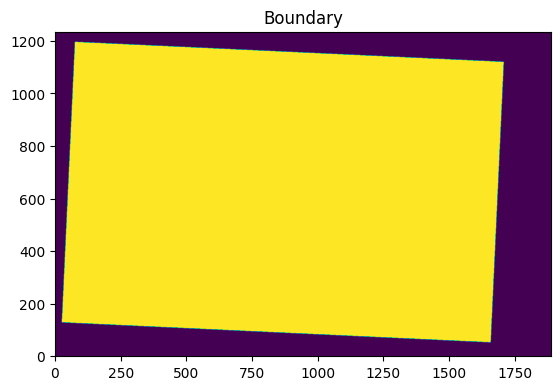

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


array([3932.19216002, 3932.52048001, 3932.78192001, 3933.04944001,
       3933.11480001, 3933.18016001, 3933.24552001, 3933.30936   ,
       3933.37472   , 3933.44008   , 3933.50544   , 3933.56928   ,
       3933.63464   , 3933.7       , 3933.76536   , 3933.83072   ,
       3933.89456   , 3933.95992   , 3934.02528   , 3934.09064   ,
       3934.15447999, 3934.21983999, 3934.28519999, 3934.35055999,
       3934.61807999, 3934.87951999, 3935.20783998, 4001.14743998])

In [6]:
reload(un)
CaK= un.SST_data('nb_3950_2019-05-06T08_34_01_scans=0-452_corrected_im.fits',
                   'use_solarnet','use_solarnet',name_of_line='CaK19', thresh=[2e-7, 5e-5])
CaK._wavel = CaK._wavel * 10 # which were in nm
CaK.line_lim = (3932.1, 3935.3)
CaK._wavel

[[4.166666666666667, 3.5], [13.5, 3.5], [22.833333333333332, 3.5]] 28


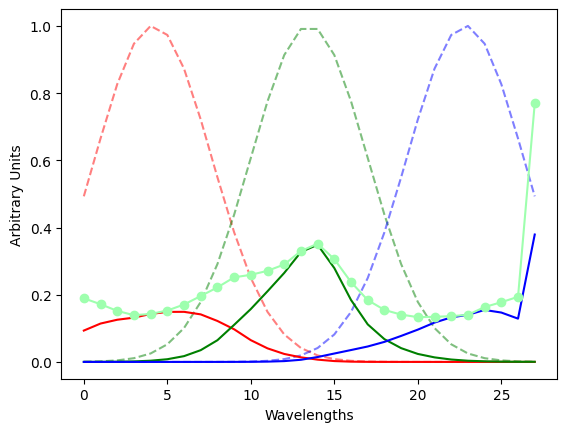

In [7]:
# %matplotlib inline
Meansd = un.gess_filters(len(CaK._wavel))
print(Meansd, len(CaK._wavel))
CaK.update_filters(Meansd)
CaK.plot_filt(880,900)

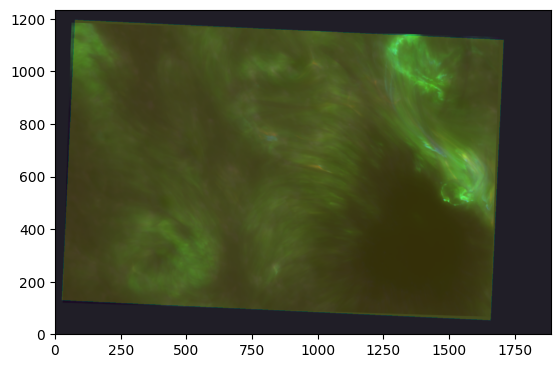

(1236, 1888, 3)


In [8]:
CaK.ccp_frame(70,Show=False)
plt.imshow(CaK.current_ccp,origin='lower')

plt.imshow(CaK.boundary,origin='lower', alpha=0.2)
plt.show()
print(np.shape(CaK.current_ccp))#@,np.shape(CaK.Boundary,origin='lower'))

In [9]:
# # Many COCOPLOTS
# r = CaK._number_of_frames
# for i in range(0,r,80):
#     # try:
#     #     print(CaK._time[i], CaK._time)
#     # except IndexError:
#     #     print(f"the timeframe is not long enough. index {i} out of bounds for time with len {len(CaK._time)}")
#     tstr = CaK.time_of_frame(i)
#     print("COCOPLOT at ", tstr, "(frame number", i,")")
#     CaK.ccp_frame(i,Show=False)
#     plt.imshow(CaK.current_ccp,origin='lower')

#     plt.imshow(CaK.boundary,origin='lower', alpha=0.1)
#     plt.show()


In [10]:
def check_scalar_not_nan(sst_data):
    if hasattr(CaK, 'scalar'):
        if np.isnan(CaK.scalar):
            print('This is a problem. The CaK.scalar is nan.')
            # A scalar which will normalize the intensity
            CaK.scalar = 0
            CaK.scalar = CaK.frame_integrated_spect(0)[0]
            if np.isnan(CaK.scalar):
                print('The problem is not fixed by renormalization.\nMake sure no other constants are nan in the definition of the scalar')
                if hasattr(CaK,'correction'):
                    print('the correction', CaK.correction )

    else:
        CaK.frame_integrated_spect(0)
        CaK.check_scalar_not_nan

check_scalar_not_nan(CaK)

np.shape(CaK.datacube)

(453, 1, 28, 1236, 1888)

[2.74586876e-06 2.44992122e-06 2.19532276e-06 2.00889352e-06
 2.02102044e-06 2.10779980e-06 2.30496201e-06 2.66863567e-06
 3.21996494e-06 3.85309499e-06 4.31884454e-06 4.45204280e-06
 4.42622010e-06 4.49148065e-06 4.58210111e-06 4.34128756e-06
 3.75668977e-06 3.09215766e-06 2.57504493e-06 2.25903446e-06
 2.09759474e-06 2.03513362e-06 2.02714557e-06 2.05447342e-06
 2.29950301e-06 2.58115132e-06 2.79958689e-06 1.23484343e-05]


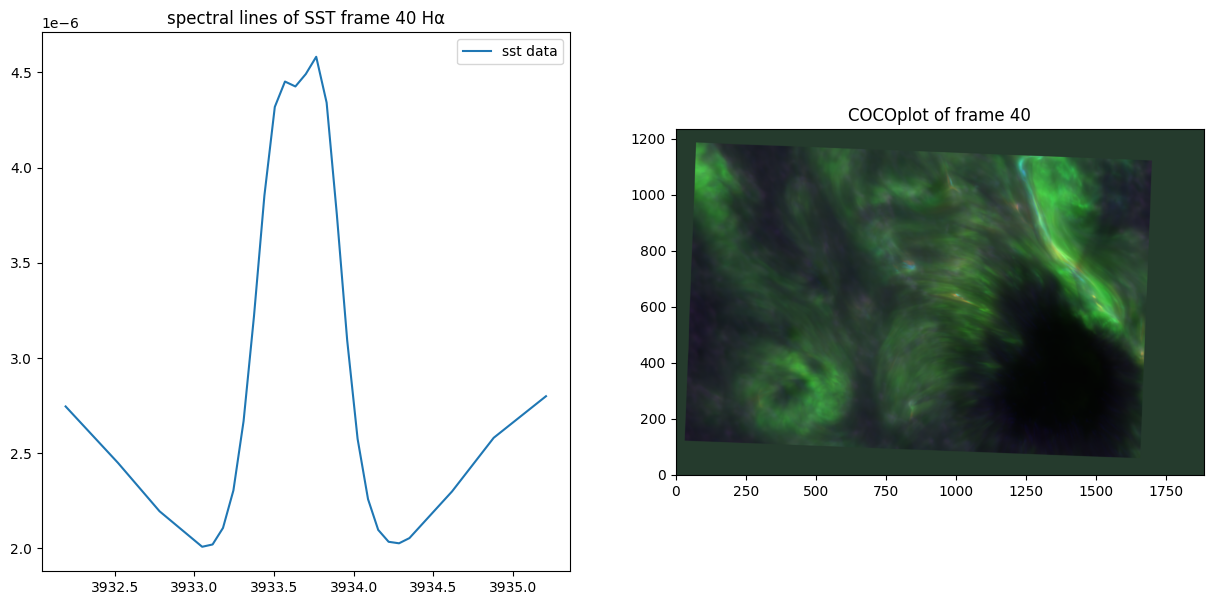

In [11]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
CaK.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
CaK.frame_integrated_spect(frame)
print(CaK.av_spect)
ax[0].plot(CaK._wavel[:-1], CaK.av_spect[:-1], label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(CaK.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

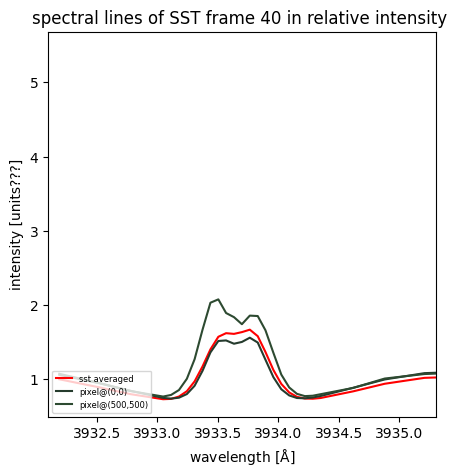

In [12]:
CaK.current_ccp[0:30:10,0:60:20,:]
# CaK.define_point_at_continuum(-1)
CaK.plot_integrate_spectr(frame, pixels=[[0,0],[500,500]])

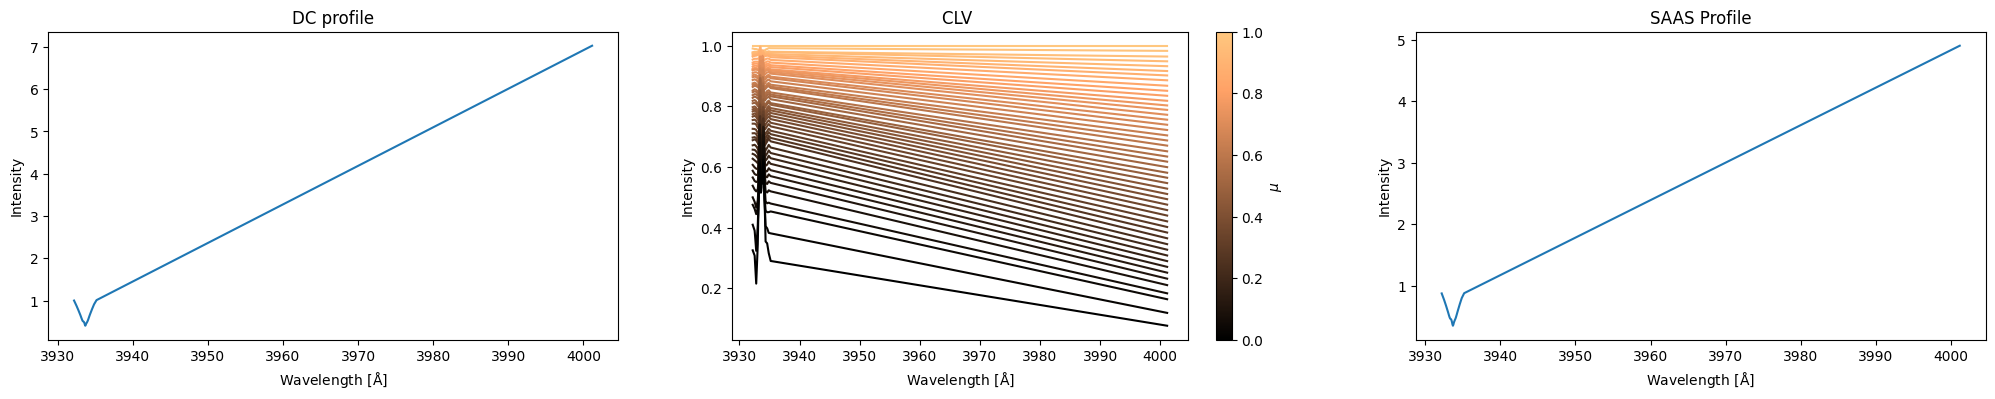

3933.7251200421415 [3932.19676006 3932.52204006 3932.78196005 3933.04188005 3933.10724005
 3933.17260005 3933.23796005 3933.30180005 3933.36716005 3933.43252005
 3933.49788004 3933.56172004 3933.62708004 3933.69244004 3933.75780004
 3933.82316004 3933.88700004 3933.95236004 3934.01772004 3934.08308004
 3934.14692004 3934.21228004 3934.27764004 3934.34300003 3934.60292003
 3934.86284003 3935.18812002 4001.14743998] [[1.         0.87620153 0.76842093 ... 0.91159718 1.00986771 7.02642874]
 [0.99070422 0.86673757 0.75995494 ... 0.90441404 1.00158354 6.90696614]
 [0.97648119 0.85636997 0.74948236 ... 0.89316074 0.98976455 6.77536039]
 ...
 [0.47531055 0.4044703  0.34149005 ... 0.41114552 0.45777378 1.1500991 ]
 [0.40946949 0.34169658 0.24846519 ... 0.34877113 0.38476981 0.83355861]
 [0.32502657 0.2695266  0.16539272 ... 0.28802065 0.29277341 0.53603683]]


In [13]:
reload(un)
theor_line = un.linestudier('final_3934.npy', atlas=None, nr=101, neglect_atlas=True)
theor_line.saas_profile_atlas_check(show_all=True)
print(np.median(theor_line.sst_wav), (theor_line.sst_wav), theor_line.sst_int)


In [14]:

def plot_separate_last_point(X, Y):
    # If we were to simply plot pts, we'd lose most of the interesting
    # details due to the outliers. So let's 'break' or 'cut-out' the y-axis
    # into two portions - use the top (ax1) for the outliers, and the bottom
    # (ax2) for the details of the majority of our data
    # fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw={'width_ratios': [10, 1]}, sharey=True)
    fig.subplots_adjust(wspace=0.02)  # adjust space between axes
    # fig.subplots_adjust(hspace=0.05)  # adjust space between axes

    # plot the same data on both axes
    ax1.plot(X, Y, '-o')
    ax2.plot(X, Y, 'o')

    # zoom-in / limit the view to different portions of the data
    delta = (- X[0] + X[-2] )/30
    ax1.set_xlim(X[0]-delta, X[-2]+delta)  # outliers only
    ax2.set_xlim(X[-1]-delta, X[-1]+delta)  # most of the data

    # hide the spines between ax and ax2
    ax1.spines.right.set_visible(False)
    ax2.spines.left.set_visible(False)
    ax1.yaxis.tick_left()
    ax1.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.yaxis.tick_right()

    # Now, let's turn towards the cut-out slanted lines.
    # We create line objects in axes coordinates, in which (0,0), (0,1),
    # (1,0), and (1,1) are the four corners of the axes.
    # The slanted lines themselves are markers at those locations, such that the
    # lines keep their angle and position, independent of the axes size or scale
    # Finally, we need to disable clipping.

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-d, -1), (d, 1)], markersize=12,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 0], [1, 0], transform=ax2.transAxes, **kwargs)

        
    # Set only one specific number as x-tick on ax2
    ax2.set_xticks([X[-1]])
    ax2.set_xticklabels([f'{X[-1]:.0f}'])  # Format the label as needed

    plt.show()


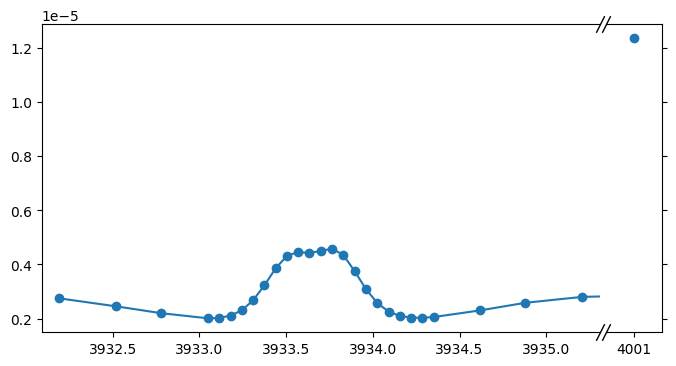

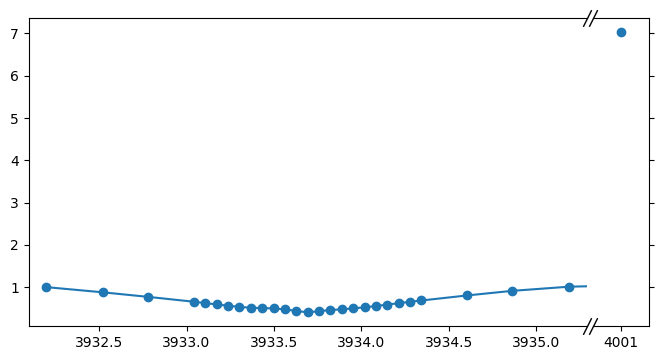

(array([3932.19216002, 3932.52048001, 3932.78192001, 3933.04944001,
        3933.11480001, 3933.18016001, 3933.24552001, 3933.30936   ,
        3933.37472   , 3933.44008   , 3933.50544   , 3933.56928   ,
        3933.63464   , 3933.7       , 3933.76536   , 3933.83072   ,
        3933.89456   , 3933.95992   , 3934.02528   , 3934.09064   ,
        3934.15447999, 3934.21983999, 3934.28519999, 3934.35055999,
        3934.61807999, 3934.87951999, 3935.20783998, 4001.14743998]),
 array([2.74586876e-06, 2.44992122e-06, 2.19532276e-06, 2.00889352e-06,
        2.02102044e-06, 2.10779980e-06, 2.30496201e-06, 2.66863567e-06,
        3.21996494e-06, 3.85309499e-06, 4.31884454e-06, 4.45204280e-06,
        4.42622010e-06, 4.49148065e-06, 4.58210111e-06, 4.34128756e-06,
        3.75668977e-06, 3.09215766e-06, 2.57504493e-06, 2.25903446e-06,
        2.09759474e-06, 2.03513362e-06, 2.02714557e-06, 2.05447342e-06,
        2.29950301e-06, 2.58115132e-06, 2.79958689e-06, 1.23484343e-05]))

In [15]:
plot_separate_last_point(CaK._wavel, CaK.av_spect)
plot_separate_last_point(theor_line.sst_wav, theor_line.sst_int[0])
CaK._wavel, CaK.av_spect


## Calculating the mu !!!!! 

(453, 1, 28, 1236, 1888)
The frame is centered at (-716.921986496582, 186.15625469630433)


 thus falling back to mode='denywrite', which means that the array will be read-only [astropy.io.fits.file]


[-749.925986496582, -683.917986496582, 154.51385469630432, 217.79865469630434]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.6315219114538115 for timeframe 0
The frame is centered at (-716.921986496582, 186.15625469630433)
[-749.925986496582, -683.917986496582, 154.51385469630432, 217.79865469630434]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.6315219114538115 for timeframe 170
We take average mu to be  0.6315219114538115
Mu also set to the theoretic nessi line.


(0.6315219114538115, array([18], dtype=int64))

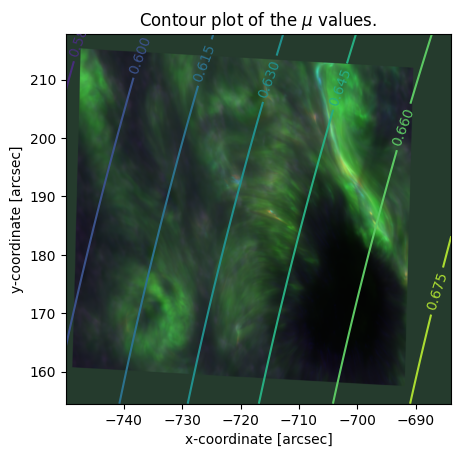

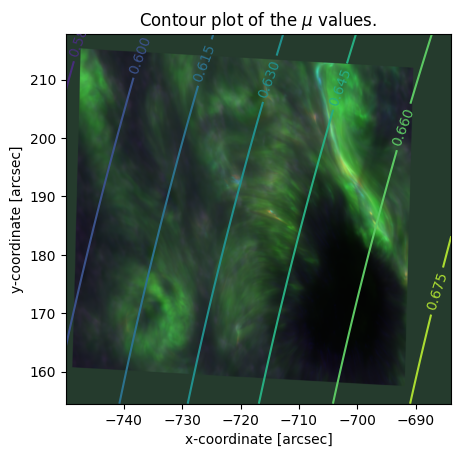

In [16]:
reload(un)
print(np.shape(CaK.datacube))
mu = CaK.set_mu(theor_line, number_of_last_frame=170, alternative_filename="fits/nb_8542_2019-05-06T08_33_15_scans=0-170_stokes_corrected_im.fits")
x = np.abs(theor_line.sst_mu-mu)
index_mu = np.where(x == np.min(x))[0]
mu, index_mu

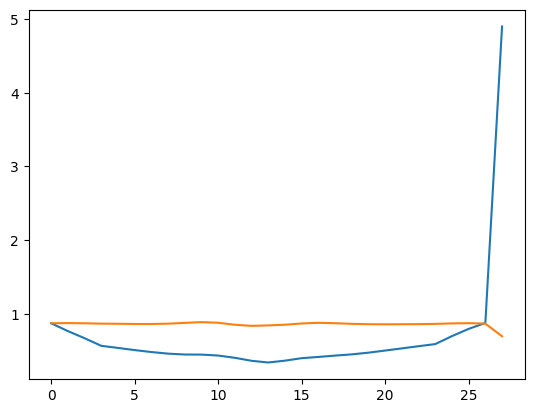

In [17]:
plt.plot(theor_line.best_fit_clv * theor_line.sst_dc)
plt.plot(theor_line.best_fit_clv)


## Finding a suitable quiet sun patch
# In this case there doesn't realy exists a goed so we use the point at the continuum

In [18]:
scaler = CaK.av_spect[0]
frame, np.shape(CaK.datacube)

(40, (453, 1, 28, 1236, 1888))

In [19]:
CaK._wavel

array([3932.19216002, 3932.52048001, 3932.78192001, 3933.04944001,
       3933.11480001, 3933.18016001, 3933.24552001, 3933.30936   ,
       3933.37472   , 3933.44008   , 3933.50544   , 3933.56928   ,
       3933.63464   , 3933.7       , 3933.76536   , 3933.83072   ,
       3933.89456   , 3933.95992   , 3934.02528   , 3934.09064   ,
       3934.15447999, 3934.21983999, 3934.28519999, 3934.35055999,
       3934.61807999, 3934.87951999, 3935.20783998, 4001.14743998])

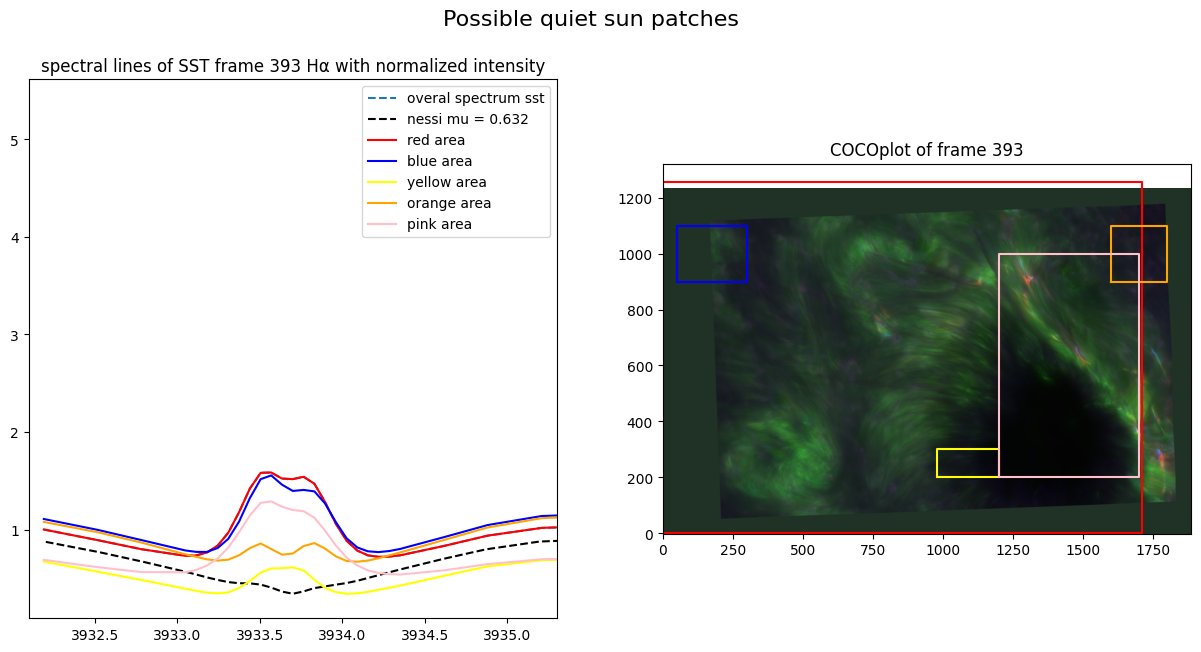

In [20]:
frame=393

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('Possible quiet sun patches', fontsize=16)

CaK.ccp_frame(frame,Show=False)
# xlim, ylim
X = [ [(0,1712), (0, 1257 ) ],[(50,300), (900, 1100)], [(980, 1200), (200, 300)] , [(1600, 1800), (900,1100) ], [(1200,1700), (200, 1000) ]]# max y: 1258, x: 1713
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaK.frame_integrated_spect(frame)
ax[0].plot(CaK._wavel, CaK.av_spect/scaler, '--', label='overal spectrum sst')
# ax[0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1], label='saas nessi')

theta = [np.median(CaK._wavel)-np.median(theor_line.sst_wav),0,1]

ax[0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1],
            '--', label=f'nessi mu = {round(CaK.mu, 3)}', color='black')

ax[1].imshow(CaK.current_ccp,origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
t=0
for i in X:
    xlim=i[0]
    ylim=i[1]
    if t<len(colors):
        color=colors[t]
    else:
        color = np.array(np.random.choice(range(256), size=3))/255
    t+=1
    ax[0].plot(CaK._wavel, CaK.frame_integrated_spect(frame, xlim=xlim, ylim=ylim)/scaler, color=color, label=str(color)+' area') #
    ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)
ax[0].legend()
ax[0].set_xlim(CaK.line_lim)

plt.show()


### The Yellow patch as quiet sun

fill in here which color the wanted quiet sun patch had 

In [21]:
color_wanted_patch = 'orange'

the edges of the patch are denoted by the xlim: (1600, 1800) and ylim: (900, 1100)


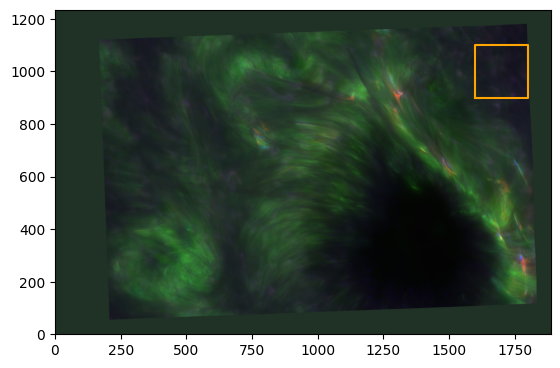

In [22]:
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)

CaK.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)


Now lets assume just that the height are equal. then we find the following:

In [23]:
# theta = [horizontal translation, vertical translation, vertical scale factor, horizontal scale factor]
X = CaK.frame_integrated_spect(frame, xlim=xlim, ylim=ylim)/scaler
# theta = [np.median(CaK._wavel)-np.median(theor_line.sst_wav), 0.55, 1]


theta = [np.median(CaK._wavel)-np.median(theor_line.sst_wav), 0,  X[-1] /(theor_line.sst_dc*theor_line.best_fit_clv)[-1]]
CaK.theta_nessi_to_quiet_sun = theta
print(theta)
print( (theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1]), X)


[0.0075599574483931065, 0, 1.0951474956693976]
[0.9566302  0.84050505 0.73484742 0.62160896 0.59049742 0.55808502
 0.52917242 0.50529905 0.49230369 0.49124538 0.47708821 0.44377096
 0.39888603 0.37408811 0.40098544 0.43778315 0.45647521 0.47614057
 0.49448698 0.51984402 0.55124761 0.58317534 0.61576965 0.64707251
 0.76543809 0.87317056 0.96070557 5.36395634] [1.07813223 0.97161089 0.86699869 0.74598658 0.72072255 0.69434318
 0.68201524 0.69122579 0.73663949 0.80948384 0.85701282 0.80014764
 0.74282619 0.75415681 0.83074943 0.86088264 0.80553864 0.72633699
 0.67772639 0.67059846 0.68190187 0.70584116 0.73590019 0.76562334
 0.894157   1.02098788 1.11700302 5.36395634]


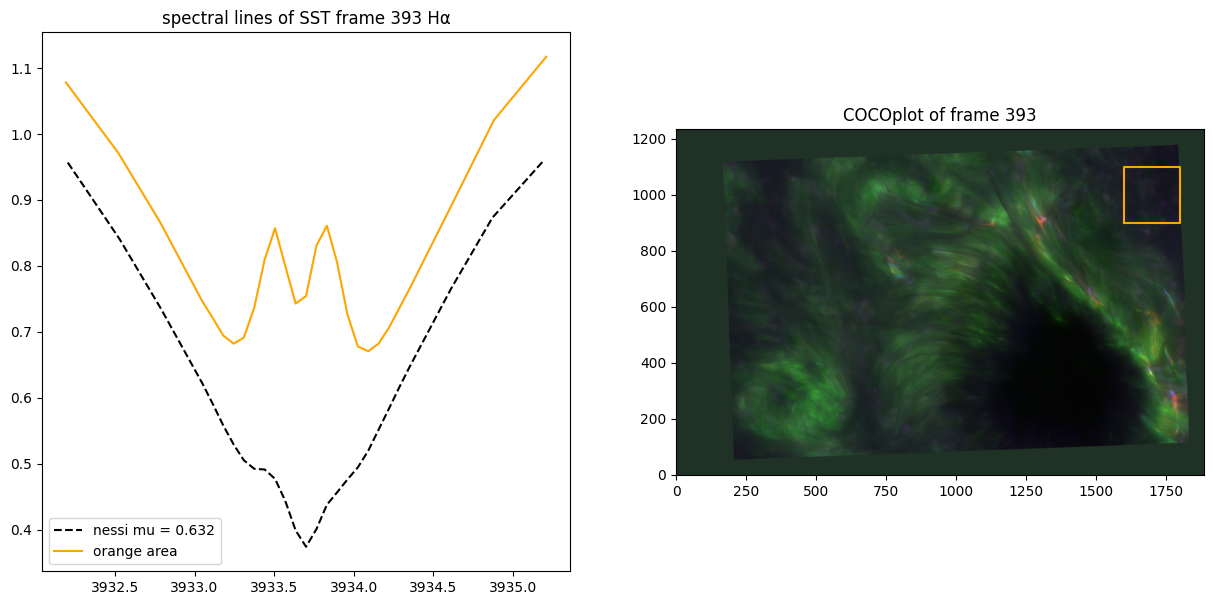

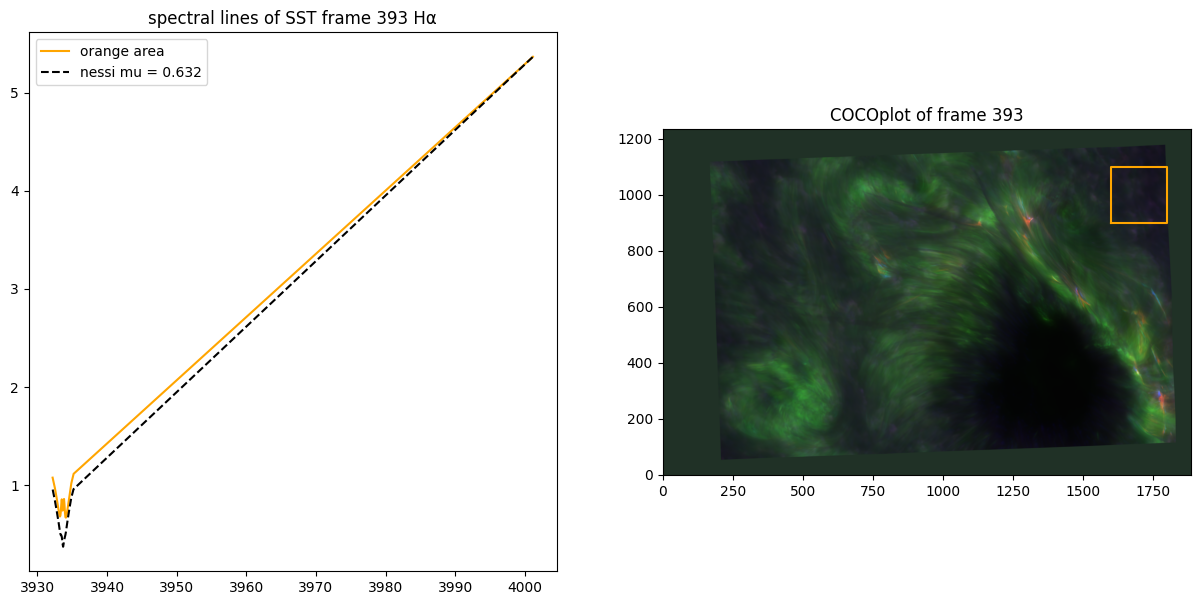

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))

CaK.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
CaK.frame_integrated_spect(frame)
# print(CaK.av_spect/scaler)
# ax[0].plot(CaK._wavel, CaK.av_spect/scaler, label='sst data')


# theta = [np.median(CaK._wavel)-np.median(theor_line.sst_wav), 0.55, 1]

ax[0].plot(theor_line.sst_wav[:-1] + theta[0], (theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1])[:-1],
            '--', label=f'nessi mu = {round(CaK.mu, 3)}', color='black')

xlim, ylim = CaK.quiet_sun['xlim'], CaK.quiet_sun['ylim']

color = color_wanted_patch

ax[0].plot(CaK._wavel[:-1], X[:-1], color=color, label=str(color)+' area') #
ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)

ax[0].legend()
# ax[0].set_xlim(CaK.line_lim)

ax[1].imshow(Image.fromarray(CaK.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

# 
# 
# 
# 
# 


fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))

CaK.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
CaK.frame_integrated_spect(frame)
# print(CaK.av_spect/scaler)
# ax[0].plot(CaK._wavel, CaK.av_spect/scaler, label='sst data')


xlim, ylim = CaK.quiet_sun['xlim'], CaK.quiet_sun['ylim']

color = color_wanted_patch

ax[0].plot(CaK._wavel, X, color=color, label=str(color)+' area') #
ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color)

ax[0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1],
            '--', label=f'nessi mu = {round(CaK.mu, 3)}', color='black')


ax[0].legend()
# ax[0].set_xlim(CaK.line_lim)

ax[1].imshow(Image.fromarray(CaK.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

In [25]:

# # alpha = [ verticale translatie, verticale schaalfactor]
# print('gess of theta used before:', theta)
# print(np.shape( CaKel[:-1]), np.shape( theor_line.sst_wav[:-1]), np.shape( theor_line.sst_dc[:-1]))

f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.sst_clv[12] + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")

# import data_analysis as da

# g = len(CaK._wavel)-1

# # dY = np.where(theor_line.sst_wav<6563.8, 0.01, 10) + np.where(6561.8<theor_line.sst_wav, 0.01, 10)

# #To simulate a specific domain around the well we cam make the errors on the wings huge
# avs = CaKt_spect
# data = [CaK._wavel[:-1],  avs[:-1] /scaler,np.zeros(g)+0.01,np.zeros(g)+0.01]

# alpha0 = [0.55,1]
# mini = da.optimalisatie(data, model=f_nessi_clv, beginwaarden=alpha0, fout_model=None, plot=False)
#                                                                 #[-0.215, -0.111, 1.26][ 2.196e-01 , 6.288e-02 , 8.458e-01]
# theta = mini['x']
# CaKa_nessi_to_quiet_sun = theta
# da.plot_fit(data, model=f_nessi_clv, theta0=mini['x'], titel="Data met fit ",labelx=" $x[]$",
#              labely=" $y$  []", figname=None , error=False)
# da.kwaliteit_fit(data, mini)
# mini

Here it seems that there is that the altlas is horizontally elongated compared to the data. Maybe its important to remark this!

--------------------------------------------------------------------------------------------------
tot hier

In [26]:
CaK._wavel

array([3932.19216002, 3932.52048001, 3932.78192001, 3933.04944001,
       3933.11480001, 3933.18016001, 3933.24552001, 3933.30936   ,
       3933.37472   , 3933.44008   , 3933.50544   , 3933.56928   ,
       3933.63464   , 3933.7       , 3933.76536   , 3933.83072   ,
       3933.89456   , 3933.95992   , 3934.02528   , 3934.09064   ,
       3934.15447999, 3934.21983999, 3934.28519999, 3934.35055999,
       3934.61807999, 3934.87951999, 3935.20783998, 4001.14743998])

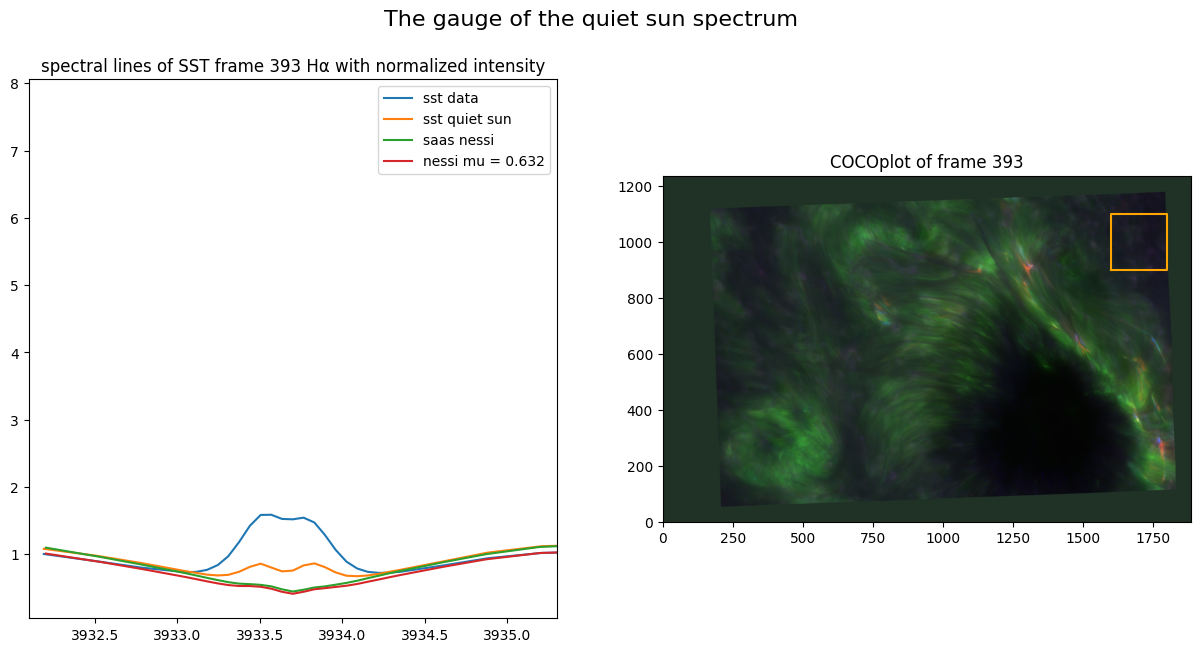

In [27]:

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# fig.setitle("quiet sun determination, weiging constants")

fig.suptitle('The gauge of the quiet sun spectrum', fontsize=16)

CaK.ccp_frame(frame,Show=False)



ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1 with normalized intensity")
CaK.frame_integrated_spect(frame)
ax[0].plot(CaK._wavel, CaK.av_spect/scaler, label='sst data')
ax[0].plot(CaK._wavel, CaK.quiet_spect/scaler, label='sst quiet sun') #

ax[0].plot(theor_line.sst_wav + theta[0], f_nessi(theta)(theor_line.sst_wav + theta[0]), label='saas nessi')
ax[0].plot(theor_line.sst_wav + theta[0], f_nessi_clv(theta)(theor_line.sst_wav + theta[0]), label=f'nessi mu = {round(CaK.mu, 3)}')
ax[0].legend()
ax[1].imshow(CaK.current_ccp, origin='lower')
ax[1].plot([xlim[0], xlim[1], xlim[1], xlim[0], xlim[0]], [ylim[0],ylim[0],ylim[1], ylim[1], ylim[0]], color=color_wanted_patch)
ax[1].set_title("COCOplot of frame "+str(frame))
ax[0].set_xlim(CaK.line_lim)

plt.show()

## How big should the flare be (assumption: linear scaling) to make a x% increase in the normal spectom in the line?

[3932.20432002 3932.52048001 3932.52960001 3932.78192001 3932.78952001
 3933.04944001 3933.04944001 3933.11480001 3933.11480001 3933.18016001
 3933.18016001 3933.24552001 3933.24552001 3933.30936    3933.30936
 3933.37472    3933.37472    3933.44008    3933.44008    3933.50544
 3933.50544    3933.56928    3933.56928    3933.63464    3933.63464
 3933.7        3933.7        3933.76536    3933.76536    3933.83072
 3933.83072    3933.89456    3933.89456    3933.95992    3933.95992
 3934.02528    3934.02528    3934.09064    3934.09064    3934.15447999
 3934.15447999 3934.21983999 3934.21983999 3934.28519999 3934.28519999
 3934.35055999 3934.35055999 3934.61047999 3934.61807999 3934.87039999
 3934.87951999 3935.19567998 3935.20783998 4001.14743998] [3932.19216002 3932.52048001 3932.78192001 3933.04944001 3933.11480001
 3933.18016001 3933.24552001 3933.30936    3933.37472    3933.44008
 3933.50544    3933.56928    3933.63464    3933.7        3933.76536
 3933.83072    3933.89456    3933.95992 

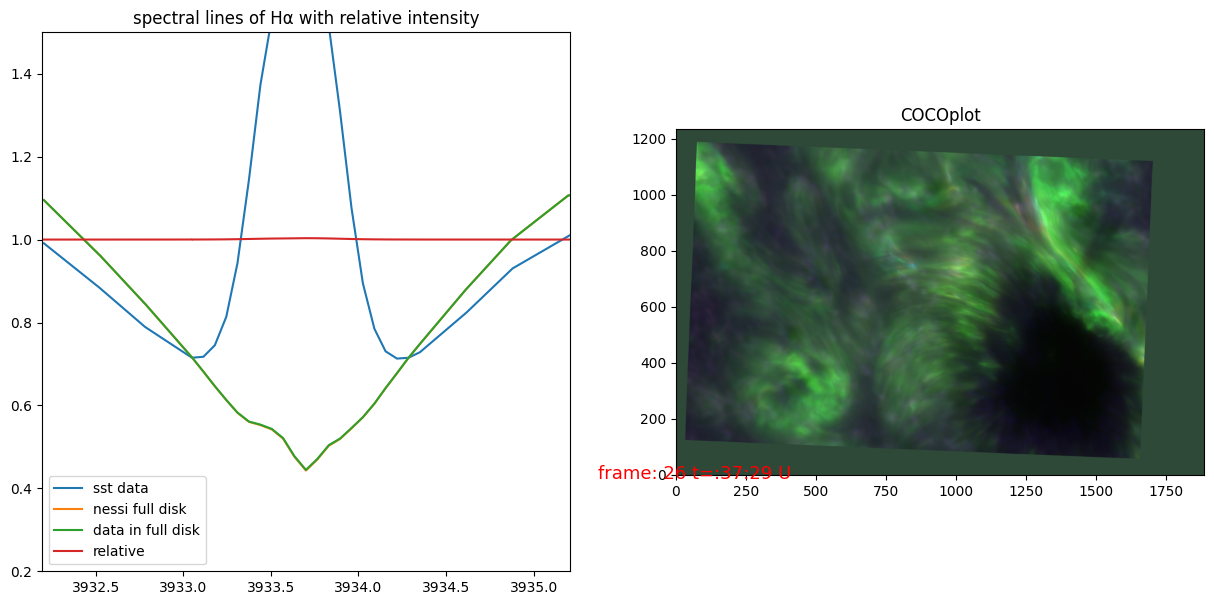

In [28]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
frame = 26

# line_sst, = ax[0].plot([], [], label='sst data')
# line_nessi, = ax[0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1], label=f'nessi mu = {round(CaK.mu, 3)}')
# line_quiet_sun, = ax[0].plot(CaK._wavel, CaK.quiet_spect/scaler, label='quiet sun spectr')
CaK.frame_integrated_spect(frame)
CaK.ccp_frame(frame,Show=False)


theor_line = theor_line

wav = un.merge_wavelengths(CaK._wavel, theor_line.sst_wav+ CaK.theta_nessi_to_quiet_sun[0])
print(wav, CaK._wavel, theor_line.sst_wav+ CaK.theta_nessi_to_quiet_sun[0])


f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                  , kind='linear', fill_value="extrapolate")
f_sst = interp1d(CaK._wavel, CaK.av_spect/CaK.scalar, kind='linear', fill_value="extrapolate")



# line_sst, = ax[0, 0].plot(CaKel, CaK.av_spect/CaK.scalar, '--', label='sst data')
# ax[0, 0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1], label=f'nessi mu = {round(CaK.mu, 3)}')
# ax[0, 0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')



a=CaK.current_ccp
im = ax[1].imshow(Image.fromarray(a), origin='lower', interpolation='none', aspect='auto', vmin=0, vmax=1)

# CaK.ccp_frame(frame,Show=False)
_tstr=(f"Ca t={CaK._time[frame][0:-7]} UT")

_tstr=_tstr[2:5]+_tstr[7:15]+_tstr[16:]
scaler = 2.7306518951052202e-08
ax[1].text(-280,-15,"frame: "+str(frame)+_tstr, fontsize=13, color='red')

ax[0].set_title("spectral lines of H\u03B1 with relative intensity")

ax[0].plot(wav, f_sst(wav), label='sst data')
# ax[0].plot(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1], label=f'nessi mu = {round(CaK.mu, 3)}')
ax[0].plot(wav, f_nessi(theta)(wav), label='nessi full disk')

areafactor = 60**2 / (np.pi*950**2)

# f_sst_full = lambda theta : f_nessi(theta) + areafactor * (f_sst - f_nessi_clv(theta))
# f_relative = lambda theta : f_sst_full(theta) / f_nessi(theta)
sst_full = f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))
relative = sst_full / f_nessi(theta)(wav)
print(relative, sst_full, f_nessi(theta)(wav) , areafactor ,f_sst(wav) , - f_nessi_clv(theta)(wav))
print("if integrated in the full disk spectrum the maximal deviation is ",  (np.max(relative)-1)*100, '%.')
# print(f_nessi(theta)(wav), f_sst(wav) - f_nessi_clv(theta)(wav))

# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
areafactor_001 = np.max((f_sst(wav) - f_nessi_clv(theta)(wav))/f_nessi(theta)(wav))**-1 * 0.01
# The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
areafactor_010 = areafactor_001 * 10

ax[0].plot(wav, sst_full , label='data in full disk')
ax[0].plot(wav, ((f_nessi(theta)(wav) + areafactor * (f_sst(wav) - f_nessi_clv(theta)(wav))) / f_nessi(theta)(wav)-1)*1+1, label='relative')

ax[0].legend(loc='lower left')
CaK.xlim = (CaK._wavel[0], CaK._wavel[-2])
ax[0].set_xlim(CaK.xlim)
ax[0].set_ylim([0.2, 1.5])
ax[1].imshow(Image.fromarray(CaK.current_ccp), origin='lower')
ax[1].set_title("COCOplot")
plt.show()

In [29]:
print("The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.\n",
      areafactor_001, "\t\t this is an increase of ", areafactor_001/areafactor *100, "%",
      "\nThe area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.\n",
      areafactor_010, "\t\t this is an increase of ", areafactor_010/areafactor *100, "%",
      "\nThe real area ratio flare/full disk that the flare has\n", areafactor)

The area ratio flare / full disk that this flare (linear scaling) should have to result in a 1% increase in its peak of the spectrum.
 0.0037220711684507915 		 this is an increase of  293.1428159346223 % 
The area ratio flare / full disk that this flare (linear scaling) should have to result in a 10% increase in its peak of the spectrum.
 0.03722071168450791 		 this is an increase of  2931.428159346223 % 
The real area ratio flare/full disk that the flare has
 0.001269712565386866


Assume now that the standard deviation is 0.2% of the spectrum than for the current flare to be detected as an increase in the H alpha line? 

## The full FOV integrated spectrum over time:

In [30]:
sst_data = CaK
np.shape(CaK.datacube)

(453, 1, 28, 1236, 1888)

In [31]:
CaK.calculate__FOV_spect_over_time()

# Best possible interval

![image.png](attachment:image.png)
<!-- ![IMG_20231123_130152(2).jpg](attachment:IMG_20231123_130152(2).jpg) -->

The goal is to find the best signal to noise ratio of detecting a flare by giving an optimal interval. Here we look at 
$$\frac{1}{\sigma}\frac{\Delta I}{I} $$
where $\sigma$ is the standard deviation of the spectrum in the interval PER UNIT AREA!(with following two options):

- Looking for an area $A$ under the interval with with $\Delta x$ for each pixel en then taking $\sum \frac{1}{n-1} (A - \bar{A})^2$
- looking at the standard deviation of the all of the wavelength values then averaging over those used in the interval. 

Remark: this has to be done per unit area or per pixel. 

Here we will display the standard devation for the two regimes for the Halpha line

D:\solar flares/data/2017-09-06\use_nessi.py:1439: RuntimeWarning: divide by zero encountered in scalar divide
  return np.nanstd(np.sum(self.datacube[frame,0,(wav<= interval[1]) &


D:\solar flares/data/2017-09-06\use_nessi.py:1430: RuntimeWarning: invalid value encountered in scalar divide
  std = integral / l_interv / appr_num**0.5


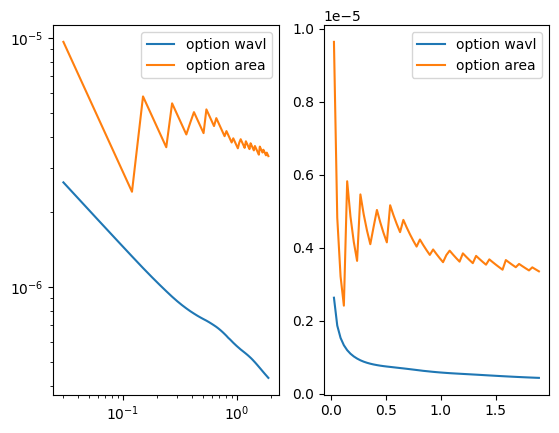

STD_Area = array([1.92841677e-05, 9.64208387e-06, 4.82104194e-06, 3.21402796e-06,
       2.41052097e-06, 5.82147247e-06, 4.85122705e-06, 4.15819462e-06,
       3.63842029e-06, 5.46047777e-06, 4.91442999e-06, 4.46766363e-06,
       4.09535832e-06, 4.57204269e-06, 5.03425077e-06, 4.69863405e-06,
       4.40496943e-06, 4.14585358e-06, 5.16364648e-06, 4.89187562e-06,
       4.64728184e-06, 4.42598270e-06, 4.76267236e-06, 4.55559965e-06,
       4.36578299e-06, 4.19115167e-06, 4.02995353e-06, 4.22452373e-06,
       4.07364788e-06, 3.93317727e-06, 3.80207136e-06, 3.95110439e-06,
       3.82763237e-06, 3.71164351e-06, 3.60247753e-06, 3.79733224e-06,
       3.91872593e-06, 3.81281441e-06, 3.71247719e-06, 3.61728547e-06,
       3.84456068e-06, 3.75079090e-06, 3.66148636e-06, 3.57633551e-06,
       3.77490737e-06, 3.69102054e-06, 3.61078096e-06, 3.53395583e-06,
       3.67994378e-06, 3.60484288e-06, 3.53274603e-06, 3.46347650e-06,
       3.39687118e-06, 3.66065411e-06, 3.59286422e-06, 3.52753942e

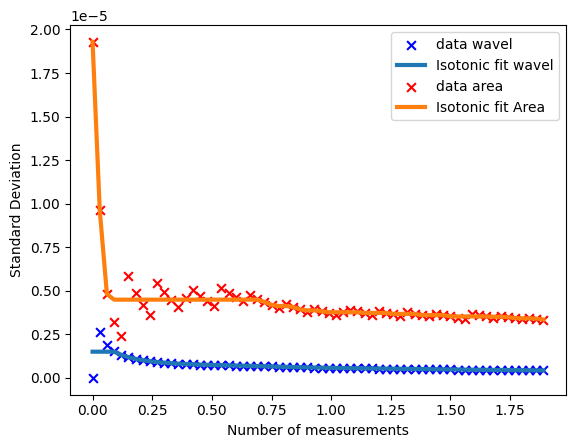

D:\solar flares/data/2017-09-06\use_nessi.py:1504: RuntimeWarning: invalid value encountered in scalar divide
  return Delta_i / I


The maximal signal to noise ratio for the area criterion is if the interval is of width $\Delta x=0.99\AA$.
at an intesity of 52.100949058253434. For a standard deviation of 3.7685987248150408e-06.

The maximal signal to noise ratio for the wavl criterion is if the interval is of width $\Delta x=1.5\AA$.
at an intesity of 359.8939417174264. For a standard deviation of 4.874497468312789e-07.



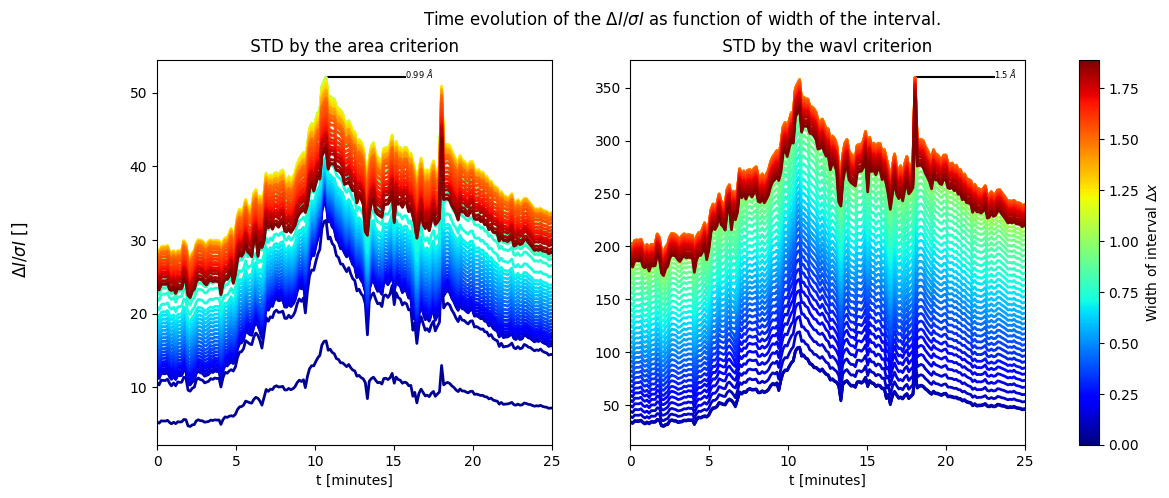

D:\solar flares/data/2017-09-06\use_nessi.py:1648: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


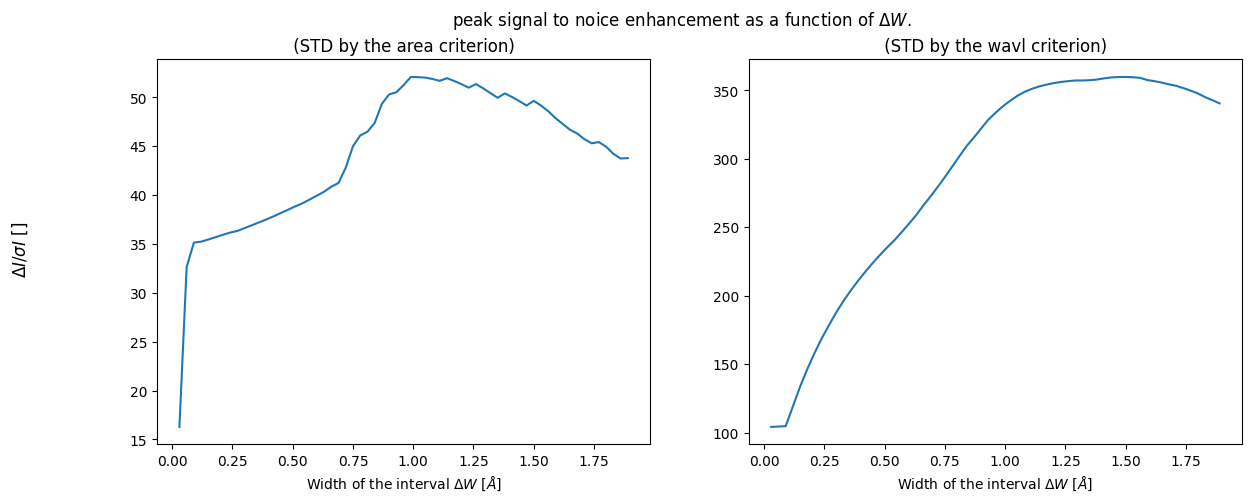

Directory 'line_data/optimal_width' already exists.


(array([[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [ 5.26434863,  5.10222237,  5.4210013 , ...,  6.85090843,
          7.76136982,  8.11151843],
        [10.63014166, 10.30544081, 10.95227245, ..., 13.81113082,
         15.6287365 , 16.34171661],
        ...,
        [24.11118772, 23.6738592 , 24.38836012, ..., 25.24280652,
         28.03865053, 29.32991338],
        [23.74010007, 23.30214237, 24.015694  , ..., 24.83124265,
         27.6178844 , 28.90130183],
        [23.64878121, 23.2047662 , 23.92598893, ..., 24.71203763,
         27.52311309, 28.81395408]]),
 array([[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [ 33.72690506,  32.6882168 ,  34.73052587, ...,  43.89145828,
          49.72447709,  51.96776107],
        [ 34.05186507,  33.01174068,  35.0837567 , ...,  44.24162708,
          50.06402018,  52.34793164],
        ...,
        [188.11197636, 184.70000293,

In [32]:
un.analyse_optimal_interval(CaK, Deltas=np.arange(0,1.9, 0.03))

# Figure 4 In HARPS ALEX
![image.png](attachment:image.png)

Now we do it for the FOV spectum with as normalisation the quiet sun

# Equivalent width

The frame integrated spectrum:
$$f(t,\lambda,A) = \int_A I(t,\lambda,\vec{x})d\vec{x}$$

weight against a continuum wavelength
$$F(t,\lambda,A) = \frac{f(t,\lambda,A)}{f(t,\lambda_\text{cont},A)} \times f(t_0,\lambda_\text{cont},A)$$

Target Region wieghted against a quiet region to find relative intensity
$$F_{TR}(t, \lambda) = \frac{F(t,\lambda,A = TR)}{F(t,\lambda,A = QR)} \times F(t_0,\lambda,A=QR)$$
This we do both with the scalar multiplication to find relative intensities

The difference in spectrum in time (we do spectrum - quiet sun)
$$\Delta F=  F_{TR}(t,\lambda) - F_{TR}(t_0,\lambda)$$

weighing it again against a reference intensity. (We incorporate this is the scalar weight)
$$\Delta S(t,\lambda) = \Delta F_{TR}(t,\lambda)/F(t_0,\lambda_\text{cont},A=\text{ full disk})$$

The equivalent width is defind as the integral over the resulting normalized pre-event-subtracted H$\alpha$ spectrum
$\Delta S(t, \lambda)$ represents the ratio of the spectral changes coming from
active events to the solar irradiance (full-disk continuum). 
$$ \Delta EW_{H\alpha \pm \Delta \lambda } = \int_{H\alpha - \Delta \lambda}^{H\alpha + \Delta \lambda} \Delta S(t,\lambda ) d\lambda $$ 


To obtain something analogous (or even maybe equivalent although only a function of the line center.) We could integrate over the difference of NESSI+sst - NESSI.








The equivalent width calculated in its difference to nessi 

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_15444\1883215414.py:15: DeprecationWarning: The 'even' keyword is deprecated as of SciPy 1.11.0 and will be removed in SciPy 1.13.0
  DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))


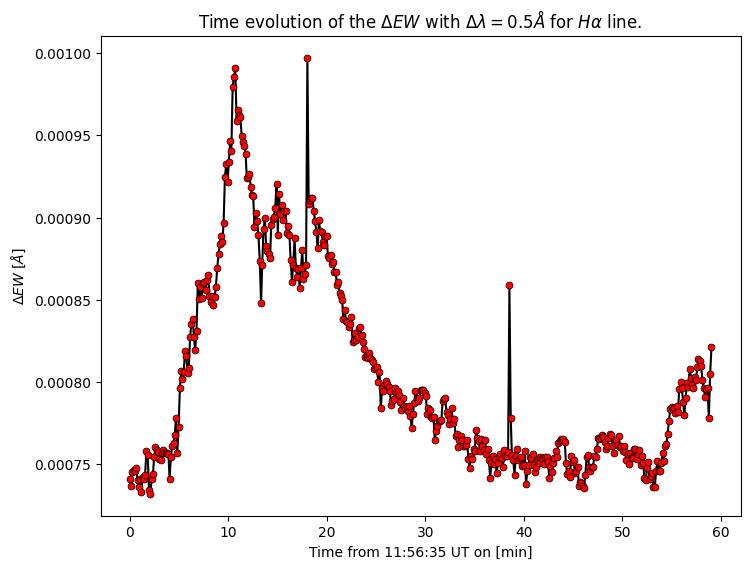

In [33]:
import scipy

def differenced_equivalent_width(sst_data, f_nessi_theta, f_nessi_clv_theta, wav, Dlambda):

    line_center = wav[np.where(f_nessi_theta(wav) == np.min(f_nessi_theta(wav)))[0][0]]
    interval = [line_center-Dlambda, line_center+Dlambda]

    DEW = []

    for frame in range(CaK._number_of_frames):
        DS = areafactor * (interp1d(CaK._wavel, CaK.FOV_spectrum[frame])(wav) - f_nessi_clv_theta(wav))

        x, restx = un.restrict_intervalx2(interval, wav)

        DEW.append( scipy.integrate.simpson(y=restx(DS), x=x, dx=1.0, axis=-1, even='avg'))

    return DEW

def plot_equivalent_width(sst_data, TIME, theor_line):
    
    f_nessi_clv = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc*theor_line.best_fit_clv + theta[1]
                                  , kind='linear', fill_value="extrapolate")
    f_nessi = lambda theta: interp1d(theor_line.sst_wav + theta[0], theta[2] * theor_line.sst_dc + theta[1]
                                    , kind='linear', fill_value="extrapolate")

    theta = sst_data.theta_nessi_to_quiet_sun
    
    DEW = differenced_equivalent_width(sst_data = sst_data, f_nessi_theta = f_nessi(theta), f_nessi_clv_theta=f_nessi_clv(theta), wav=wav, Dlambda= 0.5)

    fig = plt.figure()
    ax1 = fig.add_axes((0,0,1,1))
    ax1.plot(TIME, DEW, '-o', color='black', markerfacecolor='red', markeredgewidth=0.5, markersize=5, label=r'$\Delta EW$')
    ax1.set_title(r'Time evolution of the $\Delta EW $ with $\Delta \lambda = 0.5 \AA$ for $H\alpha$ line. ')
    ax1.set_xlabel('Time from 11:56:35 UT on [min]')
    ax1.set_ylabel(r'$\Delta EW$ $[\AA]$')
    # ax1.legend()
    plt.show()
    
TIME = sst_data.TIME
    
plot_equivalent_width(sst_data, TIME, theor_line)

The equivalent width calculated in its difference to the quiet sun patch

## maybe centroid analysis between nessi + sst and harps ?

# The different footprints of flare things in its spectrum

- Ribbon area to some of the line increases.
- adding spectrum of differnt places to the movies
- flare area
- ...

# What if the flare was 10 times bigger?
To do:

adding adding gaussian noise to the flare and multiply

time averaging or taking the x'th flare: 5min of harps 

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

In [34]:
un.save_for_further_analysis(CaK, theor_line)
